In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,f1_score, recall_score
from sklearn.model_selection import learning_curve
import numpy as np
# Load the data
data = pd.read_excel(r"C:\Users\pc\Downloads\autism_data_cleaned.xlsx")
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [6]:
# Define features (X) and target (y)
column_to_drop = ['ethnicity', 'contry_of_res', 'used_app_before', 'age_desc']
X = data.drop(column_to_drop + ['Class/ASD'], axis=1)
y = data['Class/ASD']

In [10]:
# One-hot encode categorical features
X = pd.get_dummies(X)

# Replace True/False with 1/0
X = X.replace({True: 1, False: 0})
# Feature scaling (important for Gaussian Naive Bayes)
#pour rendre les donnees sur la meme echelle (tel que de moyenne nulle et ecart-type egale a 1 )
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5,5] # Example hyperparameter
}

model = GaussianNB()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy') # 5-fold cross-validation
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'var_smoothing': 1e-05}


In [16]:
# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' pour une moyenne pondérée (utile pour les classes déséquilibrées)
print(f"F1-score: {f1}")

Accuracy: 0.9645390070921985
Confusion Matrix:
 [[88  3]
 [ 2 48]]
F1-score: 0.964616598018095


In [18]:

# Calcul du Rappel (Recall)
recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' pour une moyenne pondérée
print(f"Recall: {recall}")
print(f"Précision sur l'ensemble de test : {accuracy}")

Recall: 0.9645390070921985
Précision sur l'ensemble de test : 0.9645390070921985


In [20]:
# Calcul des courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Moyenne et écart-type des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

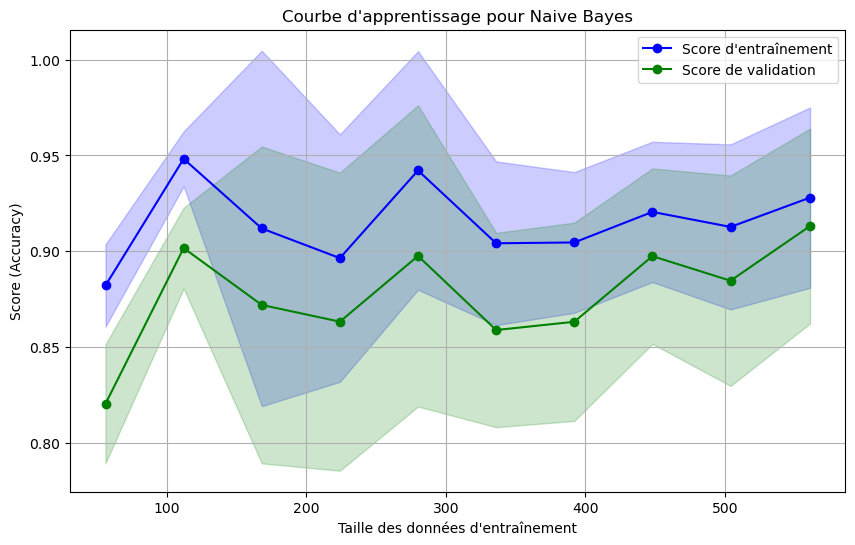

In [22]:
# Tracer la courbe d'apprentissage
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Score d\'entraînement')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

plt.plot(train_sizes, test_mean, 'o-', color='green', label='Score de validation')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

# Ajouter les titres et légendes
plt.title('Courbe d\'apprentissage pour Naive Bayes')
plt.xlabel('Taille des données d\'entraînement')
plt.ylabel('Score (Accuracy)')
plt.legend(loc='best')
plt.grid()
plt.show()